In [5]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt



Parameterliste festlegen:

In [6]:
timesteps = 1500
dim = 1
dens =  [0.3, 0.5, 0.7, 0.3, 0.5, 0.7]
# dens = [0.2]

#rb = [0.02, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
birthrate = [1]
rc = 18
deathrate = 0.02


Schleife um Paraliste abzuarbeiten:

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


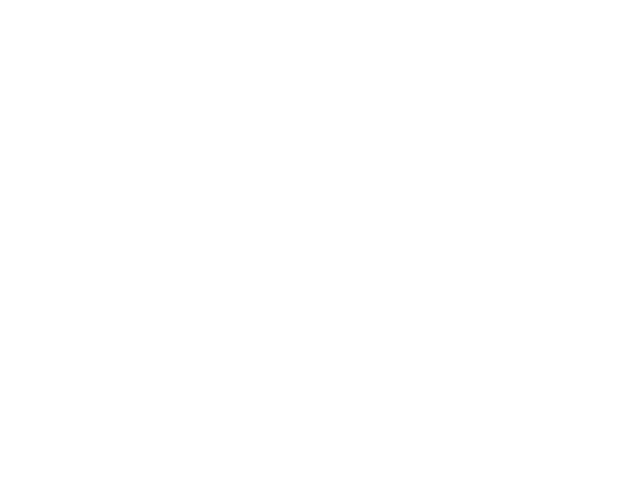

Homogeneity since k =  359


<IPython.core.display.Javascript object>


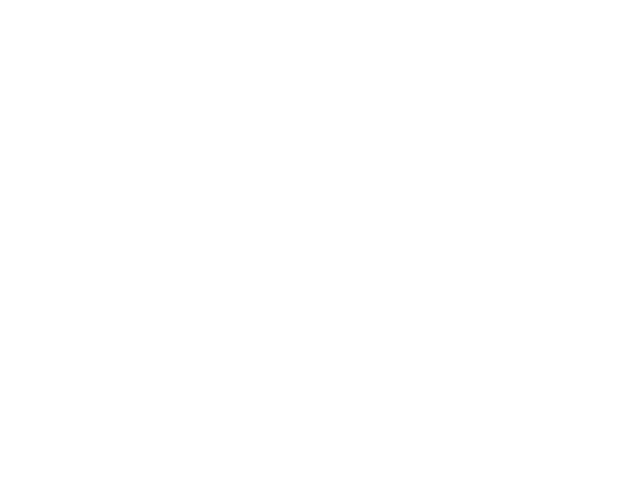

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


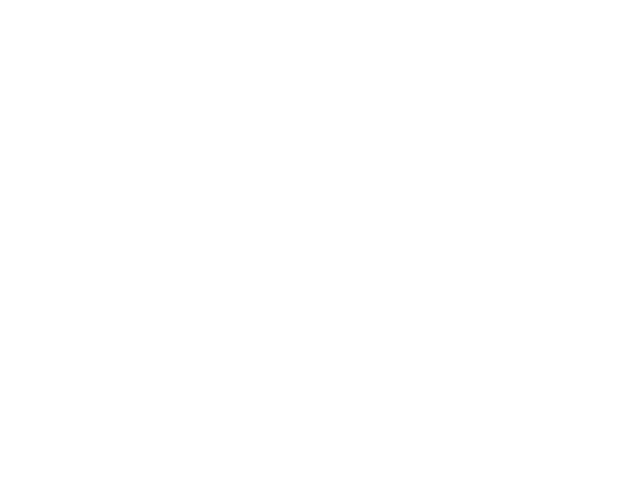

Homogeneity since k =  570


<IPython.core.display.Javascript object>


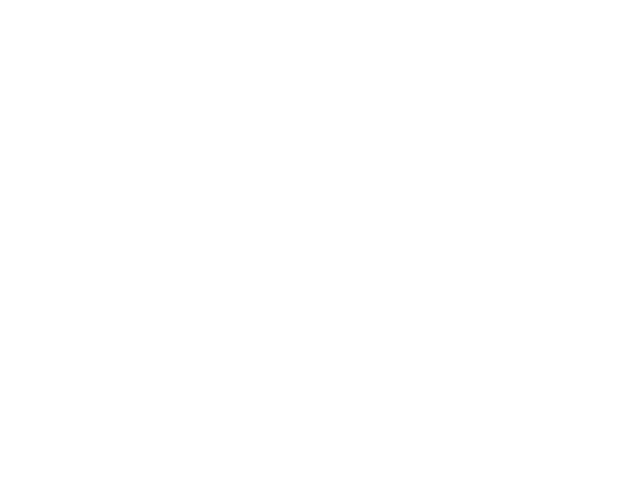

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


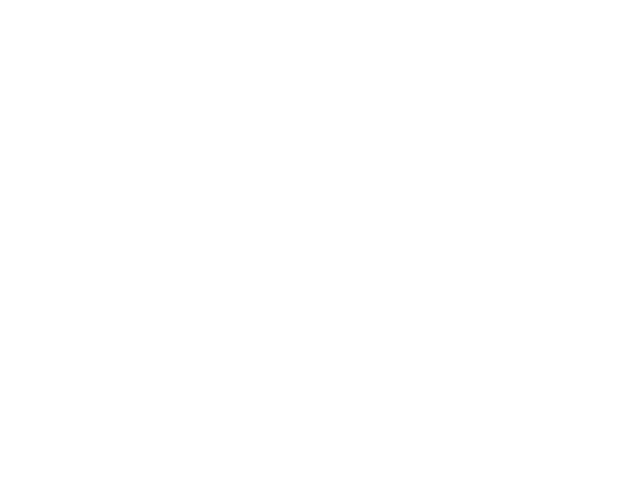

Homogeneity since k =  710


<IPython.core.display.Javascript object>


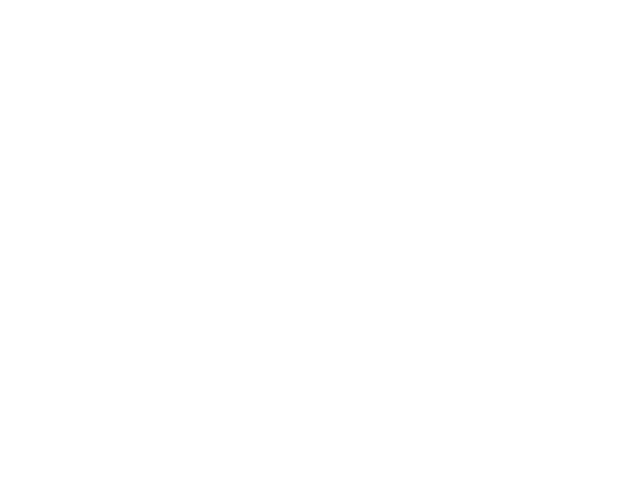

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


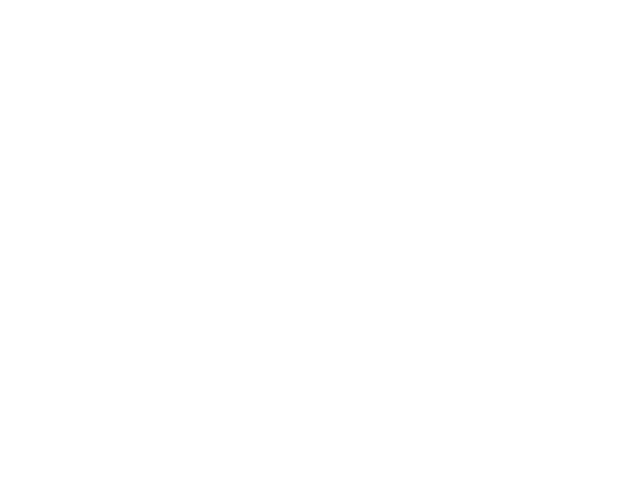

Homogeneity since k =  467


<IPython.core.display.Javascript object>


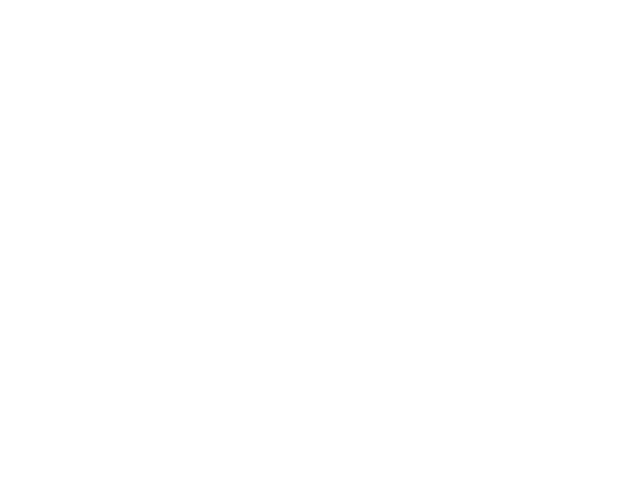

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


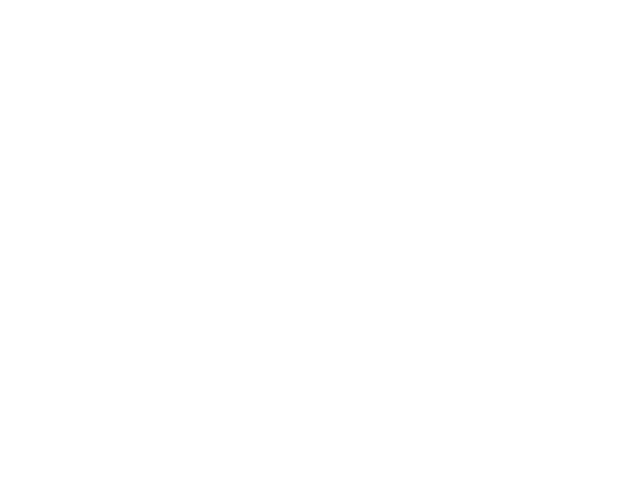

Homogeneity since k =  766


<IPython.core.display.Javascript object>


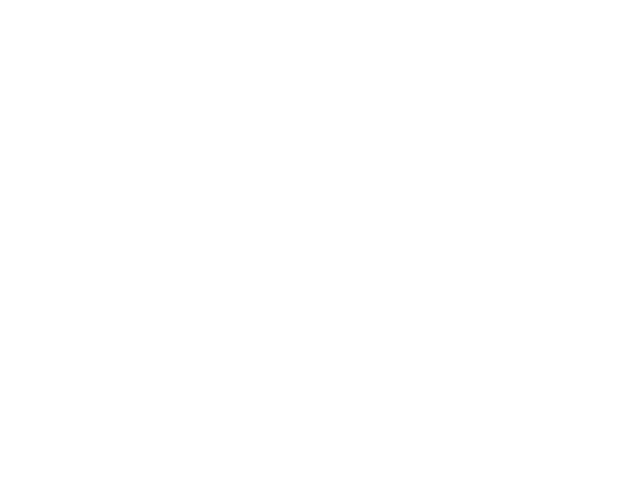

standard deviation set to =  0.1
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


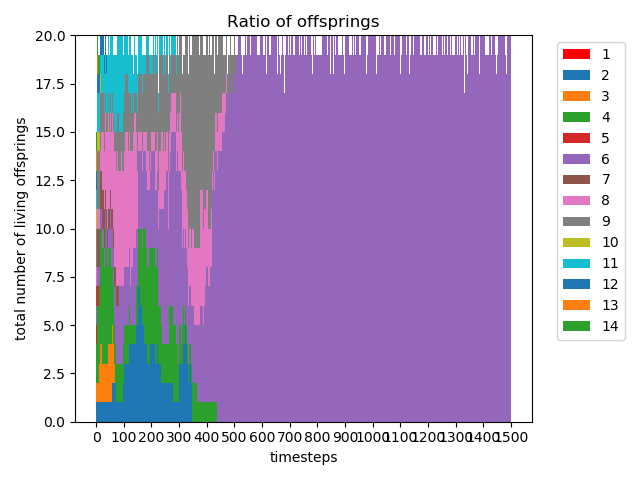

Homogeneity since k =  508


<IPython.core.display.Javascript object>


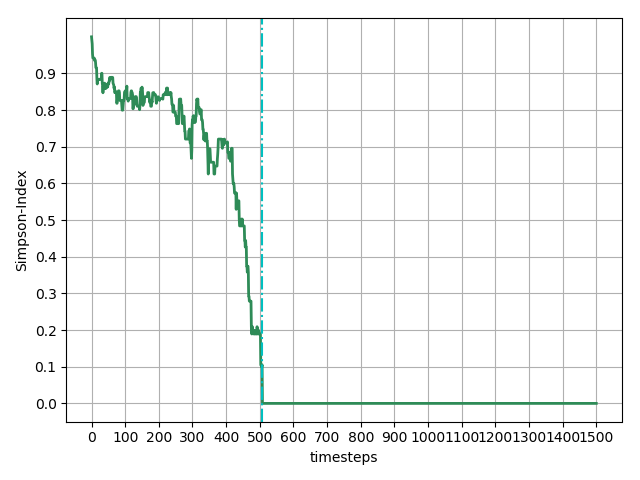

In [7]:
# for i in range(len(birthrate)):
#     lgca= get_lgca(ib=True, geometry='lin', interaction='inheritance',\
#                density = dens, dims = dim, r_b = birthrate[i], variation = False, restchannels = rc ,r_d = deathrate)
for i in range(len(dens)):
    lgca= get_lgca(ib=True, geometry='lin', interaction='inheritance',\
               density = dens[i], dims = dim, r_b = birthrate[0], variation = False, restchannels = rc ,r_d = deathrate)
    id = i+1
    lgca.timeevo(timesteps, record=True)
    %matplotlib notebook
    bar_stacked(lgca, save = True, id = id)
    ana_si(lgca, p = True, save = True, id = id)
    save_data(lgca, id = id)

In [8]:
# lgca.props_t[100]['num_off'][:]
count_fam(lgca)

---genealogical research---
number of ancestors:  14
initial density:  0.7
genealogical tree: [0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0]
max family number is 20 with ancestor cell 6
number of ancestors at beginning: 14
number of living offsprings: 20
number of died cells:  632
number of born cells:  638


20